In [1]:
# Importing Libraries
from google.colab import files
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.arima_model as smzs
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
files.upload()

In [3]:
# Loading the data
def load_data(file_path):
    df = pd.read_excel(file_path)
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df

In [4]:
df = load_data("Caribbean Cement Quaterly Stock Prices.xlsx")

In [5]:
df.head()

,Closing Price
Date,
2023-08-24,51.83
2023-08-25,50.32
2023-08-26,50.32
2023-08-27,50.32
2023-08-28,50.83


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2023-08-24 to 2023-11-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [7]:
print(df.columns)

Index(['Closing Price'], dtype='object')


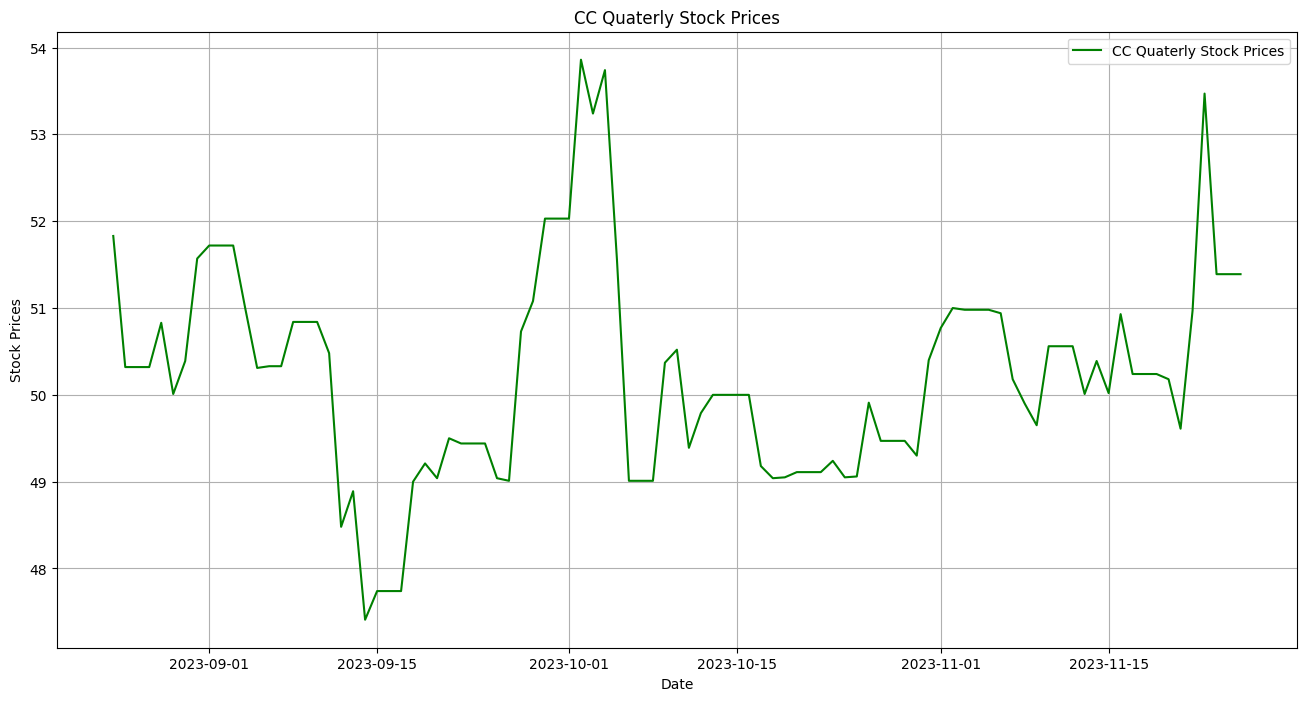

In [8]:
plt.figure(figsize=(16, 8))
plt.plot(df['Closing Price'], label='CC Quaterly Stock Prices', color='green')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('CC Quaterly Stock Prices')
plt.legend()
plt.show()


In [9]:
# Check data for Stationarity using the Augmented Dickey Fuller (ADF) Test
def check_stationarity(df):
    adf_result = adfuller(df)
    return adf_result[1] <= 0.05

# Initializing a counter
differencing_count = 0

# Continuing differencing until the p-value is less than the level of significance
df_diff = df.copy()
while not check_stationarity(df_diff):
    df_diff = df_diff.diff().dropna()


    differencing_count += 1

# Printing the number of differencing iterations
print(f'Number of differencing iterations: {differencing_count}')

Number of differencing iterations: 0


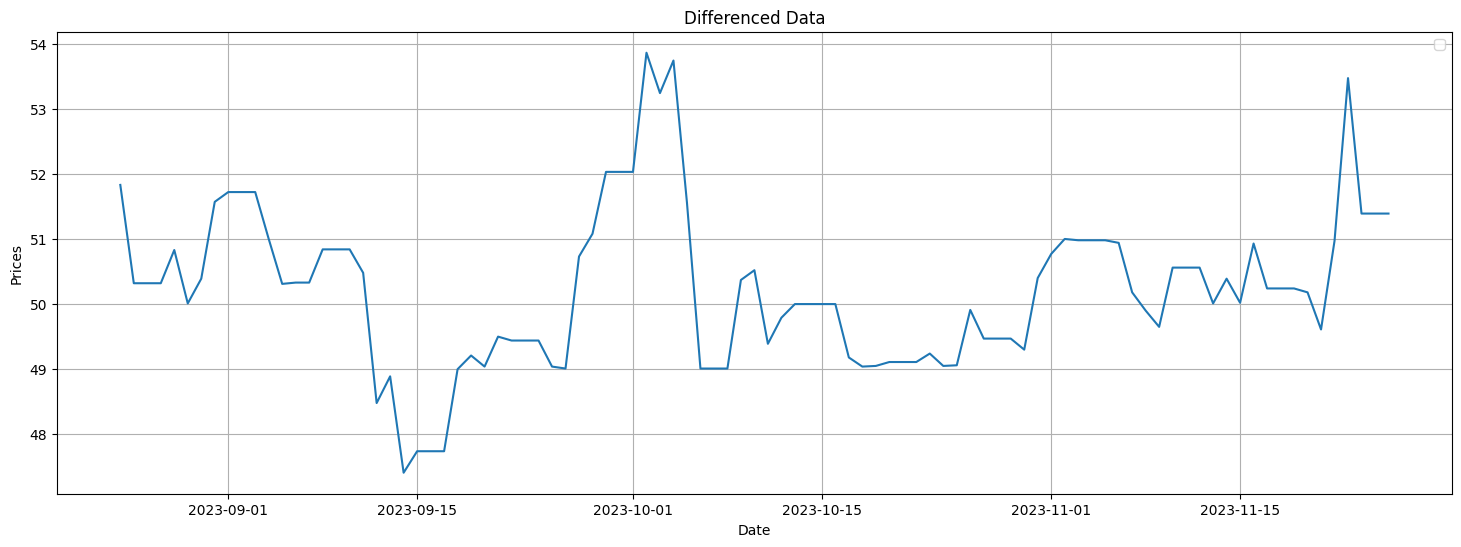

In [10]:
# Plotting the differenced data
plt.figure(figsize=(18,6))
plt.plot(df_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Test to check the stationary of the differenced time series
adf_result = adfuller(df_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
# The code shows that the p-value is less than the level of significance (alpha = 0.05).
# This shows that the differenced data is stationary.
# Rule: Accept the Alternative Hypothesis - HA to conclude that there is evidence that the data is stationary.


ADF Statistic: -3.29990394649289
p-value: 0.014882768632740137


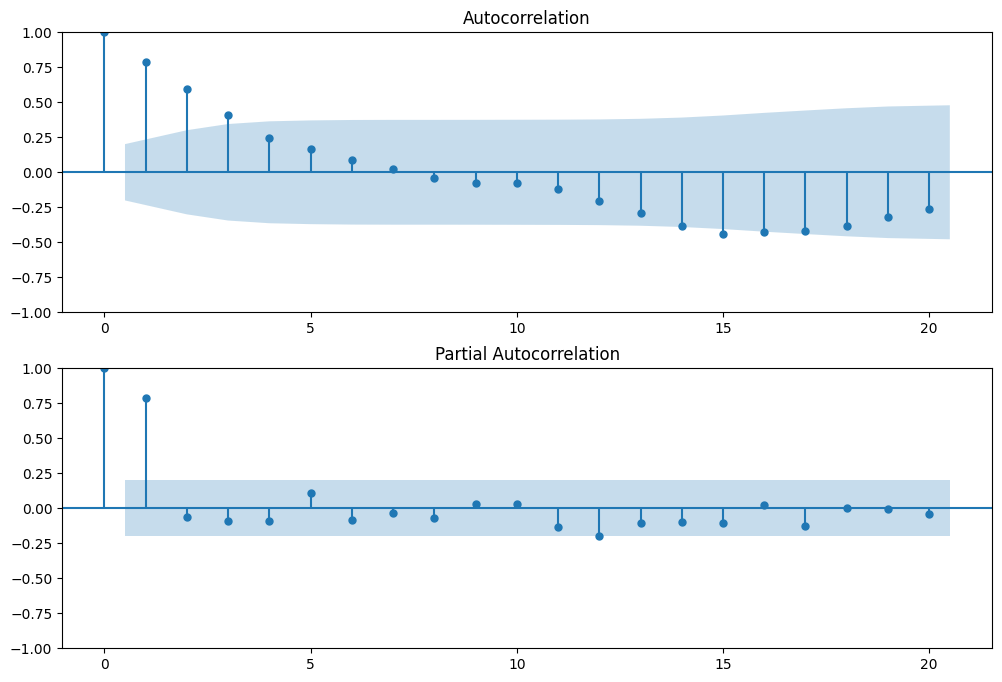

In [12]:
# Determining the AR (AutoRegressive) & MA (Moving Average) parameters using the ACF & PACF.

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df_diff, lags=20, ax=ax1)
plot_pacf(df_diff, lags=20, ax=ax2)
plt.show()


In [13]:
# Initializing an ARIMA Model
model = ARIMA(df, order=(1, 0, 0))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


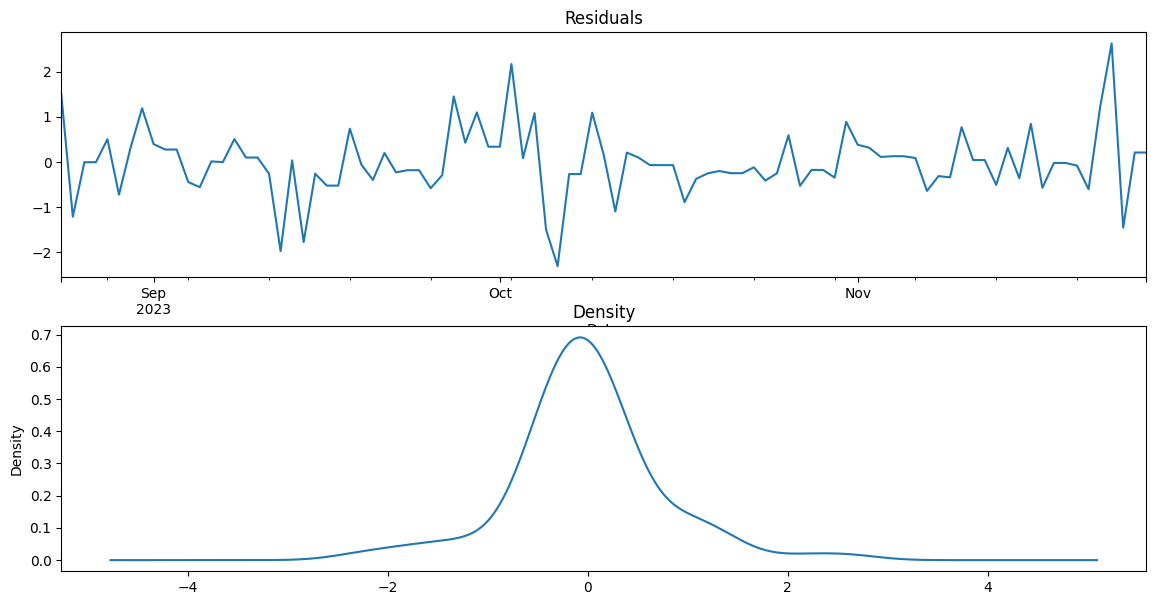

In [14]:
# Plotting the residuals
plt.figure(figsize=(14, 7))
plt.subplot(211)
result.resid.plot(title='Residuals', ax=plt.gca())
plt.subplot(212)
result.resid.plot(kind='kde', title='Density', ax=plt.gca())
plt.show()

<Figure size 1000x500 with 0 Axes>

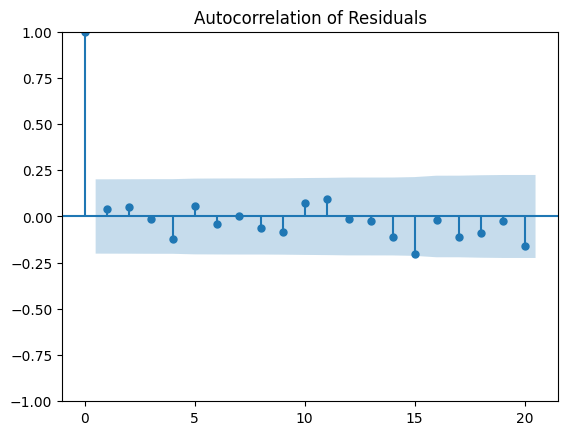

In [15]:
# Plotting the autocorrelation of the residuals to check for any remaining patterns or structures in the data that the model may not have captured
plt.figure(figsize=(10, 5))
plot_acf(result.resid, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()


In [16]:
# # Forecasting the next 5 steps using an ARIMA model, obtaining predicted mean values and confidence intervals.

forecast_results = result.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
# Printing the values
print(forecast_results)
print(forecast_mean)
print(conf_int)


2023-11-27    51.178416
2023-11-28    51.009297
2023-11-29    50.874119
2023-11-30    50.766072
2023-12-01    50.679710
Freq: D, Name: predicted_mean, dtype: float64
            lower Closing Price  upper Closing Price
2023-11-27            49.736429            52.620403
2023-11-28            49.163282            52.855312
2023-11-29            48.810993            52.937246
2023-11-30            48.575473            52.956671
2023-12-01            48.411418            52.948001


In [17]:
import itertools

# Definimg sets of (p, d, q) values for the ARIMA model
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)

# Generating all possible combinations of (p, d, q)
orders = list(itertools.product(p_values, d_values, q_values))

# Initializing a DataFrame to store model evaluation results
results_df = pd.DataFrame(columns=['ORDER', 'AIC', 'BIC', 'MSE'])

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

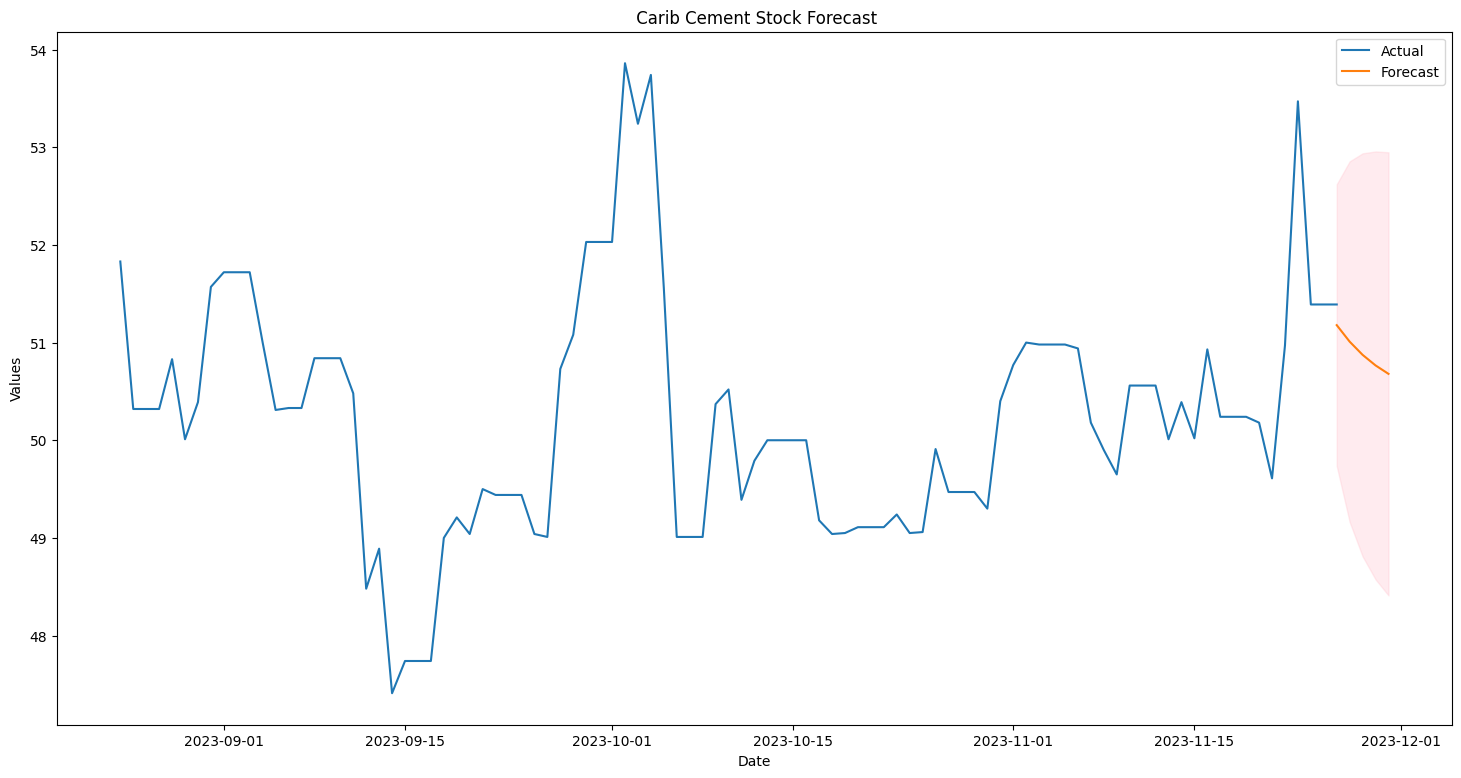

In [18]:
# Generating forecasts and plot results
forecast_results = result.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plotting actual vs. forecast with their confidence intervals
plt.figure(figsize=(18, 9))
plt.plot(df['Closing Price'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=5, freq='D'), forecast_mean, label='Forecast')
plt.fill_between(pd.date_range(start=df.index[-1], periods=5, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(' Carib Cement Stock Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [19]:
# Fitting the models to compute the AIC, BIC, MSE
for order in orders:
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    aic = model_fit.aic
    bic = model_fit.bic

    # Forecasting the model
    forecast_steps = len(test_data)
    forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean
    mse = mean_squared_error(test_data, forecast)

    # Storing Results
    results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)

# Printing the results
print(results_df)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-19-39c3e31a1e0a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

   ORDER         AIC         BIC          MSE      Order
0    NaN  256.364809  261.026275     0.971927  (0, 0, 0)
1    NaN  201.826638  208.818838     0.954668  (0, 0, 1)
2    NaN  182.692171  192.015104     0.937075  (0, 0, 2)
3    NaN  165.152483  176.806150     0.924702  (0, 0, 3)
4    NaN  169.379511  171.696999     0.927884  (0, 1, 0)
..   ...         ...         ...          ...        ...
59   NaN  169.318767  185.447223     2.079264  (3, 2, 3)
60   NaN  224.717827  233.879665  1100.124748  (3, 3, 0)
61   NaN  200.384839  211.837136    25.084314  (3, 3, 1)
62   NaN  198.825303  212.568060    34.261501  (3, 3, 2)
63   NaN  193.747289  209.780505    33.916200  (3, 3, 3)

[64 rows x 5 columns]


<ipython-input-19-39c3e31a1e0a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Order': order, 'AIC': aic, 'BIC': bic, 'MSE': mse}, ignore_index=True)


In [20]:
# Finding the model with the best AIC, BIC and MSE

best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
best_bic_model = results_df.loc[results_df['BIC'].idxmin()]
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]

print(f'The best AIC model : {best_aic_model}')
print(f'The best BIC model : {best_bic_model}')
print(f'The best MSE Model : {best_mse_model}')


The best AIC model : ORDER           NaN
AIC      161.809728
BIC      180.455595
MSE         0.91924
Order     (3, 0, 3)
Name: 51, dtype: object
The best BIC model : ORDER           NaN
AIC      169.379511
BIC      171.696999
MSE        0.927884
Order     (0, 1, 0)
Name: 4, dtype: object
The best MSE Model : ORDER           NaN
AIC      185.021881
BIC      191.893259
MSE        0.563644
Order     (0, 3, 2)
Name: 14, dtype: object


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


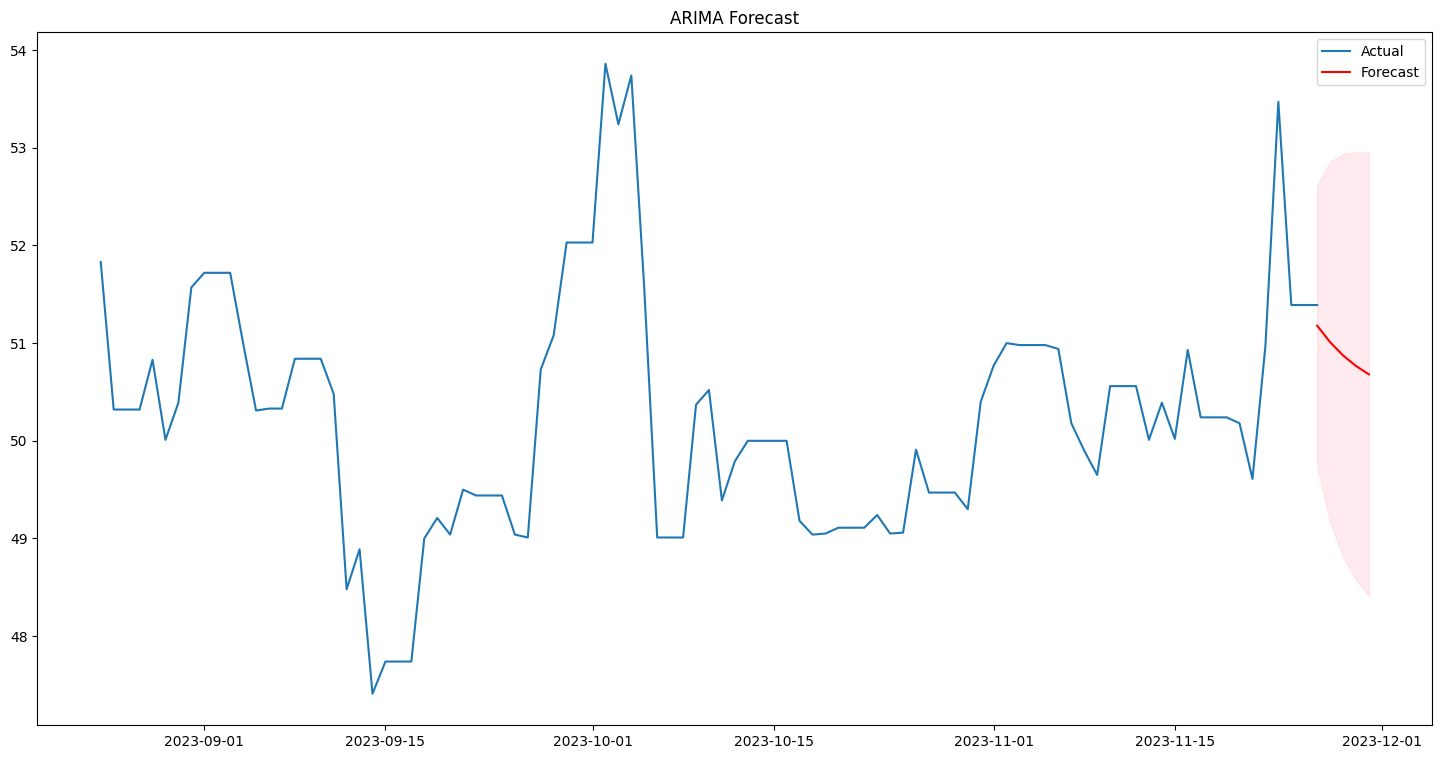

In [21]:
# # Creating a date range for the forecast period based on the last timestamp in the dataset

# Fitting the best model on the training data
best_order = (1,0,0)
best_model= ARIMA(df,order=best_order)
best_model_fit = best_model.fit()

# Forecasting 5 years into the future
forecast_results = best_model_fit.get_forecast(steps=5)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Creating a new date range for the forecast period
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='D')

# Assigning the forecast index
forecast_mean.index = forecast_index
conf_int.index = forecast_index

# Plotting the original data and the forecast
plt.figure(figsize=(18,9))
plt.plot(df, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)

plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [22]:
# Generating forecasts with the AIC model and printing results
forecast_results2 = best_model_fit.get_forecast(steps=5)
forecast_mean2 = forecast_results2.predicted_mean
conf_int2 = forecast_results2.conf_int()
print(forecast_results2)
print(forecast_mean2)
print(conf_int2)

2023-11-27    51.178416
2023-11-28    51.009297
2023-11-29    50.874119
2023-11-30    50.766072
2023-12-01    50.679710
Freq: D, Name: predicted_mean, dtype: float64
            lower Closing Price  upper Closing Price
2023-11-27            49.736429            52.620403
2023-11-28            49.163282            52.855312
2023-11-29            48.810993            52.937246
2023-11-30            48.575473            52.956671
2023-12-01            48.411418            52.948001


In [23]:
from tabulate import tabulate
# Evaluating the model on the training set

train_forecast = best_model_fit.get_forecast(steps=len(train_data)).predicted_mean
train_mae = mean_absolute_error(train_data, train_forecast)
train_mse = mean_squared_error(train_data, train_forecast)
train_rmse = np.sqrt(train_mse)

# Evaluating the model on the testing set
forecast_results = best_model_fit.get_forecast(steps=len(test_data))
test_forecast = forecast_results.predicted_mean
test_mae = mean_absolute_error(test_data, test_forecast)
test_mse = mean_squared_error(test_data, test_forecast)
test_rmse = np.sqrt(test_mse)

# Organizing metrics in a tabular form
metrics_table = [
    ["Metric", "Training Set", "Testing Set"],
    ["Mean Absolute Error (MAE)", f"{train_mae:.2f}", f"{test_mae:.2f}"],
    ["Mean Squared Error (MSE)", f"{train_mse:.2f}", f"{test_mse:.2f}"],
    ["Root Mean Squared Error (RMSE)", f"{train_rmse:.2f}", f"{test_rmse:.2f}"],
]

In [24]:
# Calculating F1 score for training set
from sklearn.metrics import f1_score
from tabulate import tabulate

# Calculating F1 score for training set
train_directions = np.sign(train_data.diff().dropna())
train_forecast_directions = np.sign(train_forecast.diff().dropna())
train_f1 = f1_score(train_directions, train_forecast_directions, average='weighted')

# Calculating F1 score for testing set
test_directions = np.sign(test_data.diff().dropna())
test_forecast_directions = np.sign(test_forecast.diff().dropna())
test_f1 = f1_score(test_directions, test_forecast_directions, average='weighted')

# Adding F1 score to the metrics table
metrics_table.append(["F1 Score", f"{train_f1:.2f}", f"{test_f1:.2f}"])

# Printing the tabular form
print(tabulate(metrics_table, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════════════════╤════════════════╤═══════════════╕
│ Metric                         │   Training Set │   Testing Set │
╞════════════════════════════════╪════════════════╪═══════════════╡
│ Mean Absolute Error (MAE)      │           1.02 │          0.7  │
├────────────────────────────────┼────────────────┼───────────────┤
│ Mean Squared Error (MSE)       │           1.64 │          0.97 │
├────────────────────────────────┼────────────────┼───────────────┤
│ Root Mean Squared Error (RMSE) │           1.28 │          0.98 │
├────────────────────────────────┼────────────────┼───────────────┤
│ F1 Score                       │           0.14 │          0.22 │
╘════════════════════════════════╧════════════════╧═══════════════╛
